## Understanding Data and Visualization

In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd

In [2]:
fname1 = "electron_30deg_50wob_NOISE120.mscw.fits"
with fits.open(fname1) as hdul:
   df1 = Table.read(hdul[1]).to_pandas()

fname2 = "protons_30deg_5.0wob_NOISE120.mscw.fits"
with fits.open(fname2) as hdul:
   df2 = Table.read(hdul[1]).to_pandas()

fname3 = "helium_30deg_5.0wob_NOISE120.mscw.fits"
with fits.open(fname3) as hdul:
   df3 = Table.read(hdul[1]).to_pandas()

In [3]:
df1.head()

,runNumber,EVENT_ID,MJD,Time,TargetElev,TargetAz,TargetDec,TargetRA,WobbleN,WobbleE,...,loss_2,tgrad_x_2,size2_2,loss_3,tgrad_x_3,size2_3,ENERGY_MC,El,RA,DEC
0,301200,687,0,7205.416073,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009766,1.389887,1549.211914,0.000000,0.292370,4161.781250,0.947242,60.069143,0.0,0.0
1,301200,733,0,7205.784078,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-0.075913,1359.550049,0.000000,-0.387902,1142.989014,0.412226,60.046007,0.0,0.0
2,301200,971,0,7207.688103,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,-1.313970,506.331024,0.000000,3.665224,726.827454,0.225460,60.573046,0.0,0.0
3,301200,1451,0,7211.528155,0.0,0.0,0.0,0.0,0.0,0.0,...,0.159045,-1.847678,1097.658569,0.000000,-2.297319,852.899780,0.332203,59.655342,0.0,0.0
4,301200,1739,0,7213.832186,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.183963,5993.082520,0.030323,1.688663,2358.001953,1.144007,59.975325,0.0,0.0


In [4]:
#df1.tail()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466422 entries, 0 to 466421
Data columns (total 59 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   runNumber           466422 non-null  int32  
 1   EVENT_ID            466422 non-null  int32  
 2   MJD                 466422 non-null  int32  
 3   Time                466422 non-null  float64
 4   TargetElev          466422 non-null  float64
 5   TargetAz            466422 non-null  float64
 6   TargetDec           466422 non-null  float64
 7   TargetRA            466422 non-null  float64
 8   WobbleN             466422 non-null  float64
 9   WobbleE             466422 non-null  float64
 10  LTrig               466422 non-null  uint64 
 11  NTrig               466422 non-null  uint32 
 12  NImages             466422 non-null  int32  
 13  ImgSel              466422 non-null  uint64 
 14  NTtype              466422 non-null  int32  
 15  img2_ang            466422 non-nul

In [6]:
# for col in df1.columns:
#     print(col, len(df1[col].unique()), df1[col].unique())

In [7]:
# df1.describe()

## Data Visualization

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

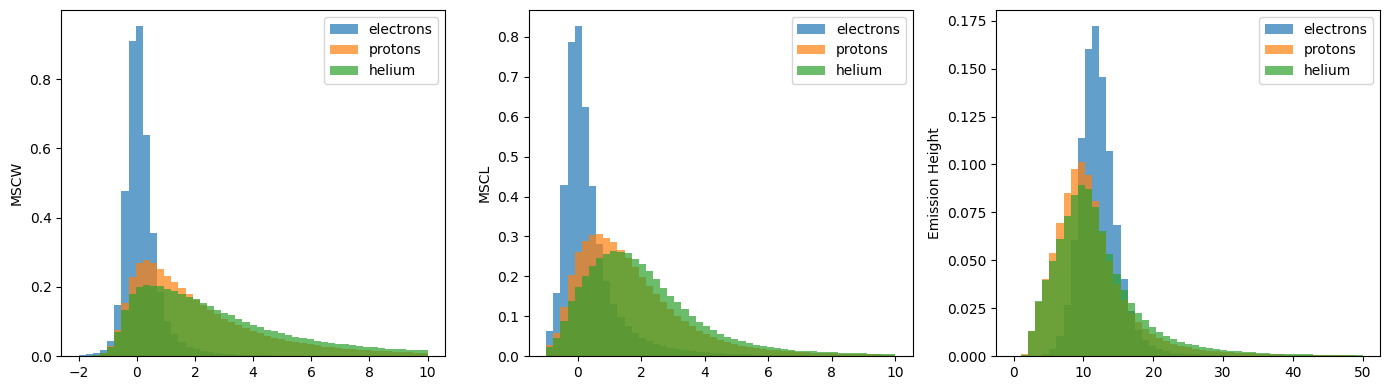

In [9]:
#fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10,7))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4), tight_layout=True)  
ax1.hist(df1['MSCW'], alpha = 0.7, bins = np.linspace(-2,10), label = 'electrons', density =True)
ax1.hist(df2['MSCW'], alpha = 0.7, bins = np.linspace(-2,10), label = 'protons', density =True)
ax1.hist(df3['MSCW'], alpha = 0.7, bins = np.linspace(-2,10), label = 'helium', density =True)
ax1.set_ylabel('MSCW')
ax1.legend()

ax2.hist(df1['MSCL'], alpha = 0.7, bins = np.linspace(-1,10), label = 'electrons', density =True)
ax2.hist(df2['MSCL'], alpha = 0.7, bins = np.linspace(-1,10), label = 'protons', density =True)
ax2.hist(df3['MSCL'], alpha = 0.7, bins = np.linspace(-1,10), label = 'helium', density =True)
ax2.set_ylabel('MSCL')
ax2.legend()

ax3.hist(df1['EmissionHeight'], alpha = 0.7, bins = np.linspace(0,50), label = 'electrons', density =True)
ax3.hist(df2['EmissionHeight'], alpha = 0.7, bins = np.linspace(0,50), label = 'protons', density =True)
ax3.hist(df3['EmissionHeight'], alpha = 0.7, bins = np.linspace(0,50), label = 'helium', density =True)
ax3.set_ylabel('Emission Height')
ax3.legend()

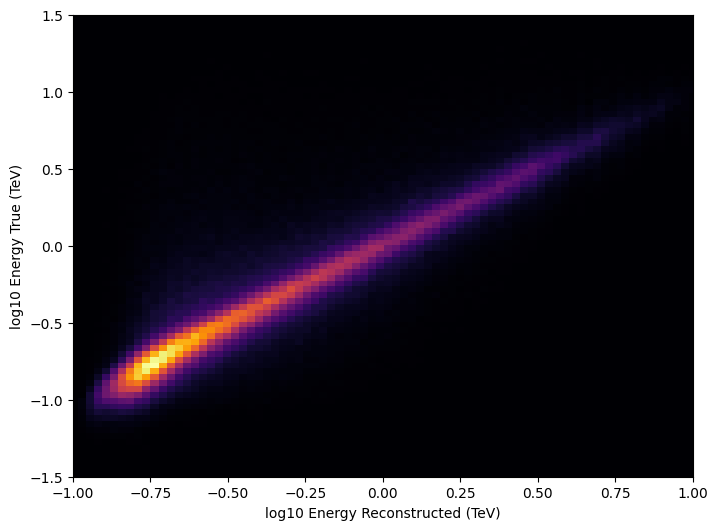

In [10]:
fig, ax = plt.subplots(figsize = (8,6))  

h = ax.hist2d(np.log10(df1['ENERGY']),np.log10(df1['ENERGY_MC']), bins=100, cmap = 'inferno')
#fig.colorbar(h[3], ax=ax)
ax.set_ylabel('log10 Energy True (TeV)')
ax.set_xlabel('log10 Energy Reconstructed (TeV)')
ax.set_xlim(-1.0,1.0)
ax.set_ylim(-1.5,1.5)
plt.show()

## Data Preparation

In [ ]:
showers = [df1, df2, df3]  # electron, proton, helium simulations
for df in showers:
    print(len(df))

In [ ]:
# drop Ze, EChi2S, X/Y derot

In [ ]:
for df in showers:
    df.drop(['runNumber', 'EVENT_ID', 'MJD', 'Time', 'TargetElev', 'TargetAz', 'TargetDec',
            'TargetRA', 'WobbleN', 'WobbleE', 'LTrig', 'NTrig', 'NImages', 'ImgSel', 'NTtype',
            'img2_ang', 'ra', 'dec', 'theta2', 'ENERGY', 'dES', 'NTelPairs', 'TIME', 'timeOfDay',
            'El', 'RA', 'DEC', 'EChi2S', 'Ze', 'MWR', 'MLR'], axis=1, inplace=True)

In [ ]:
df1.dtypes

In [ ]:
#pd.get_dummies(df1)  # doesn't do a whole lot because all columns are numerical

df1['SizeSecondMax']

## Feature Selection

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfreg = RandomForestRegressor()

In [ ]:
df1_20 = df1.iloc[:1000,:]

In [ ]:
X = df1_20.drop('ENERGY_MC', axis=1)
y = df1_20['ENERGY_MC']

In [ ]:
rfecv = RFECV(estimator=rfreg, step=1, scoring="neg_mean_squared_error", cv=4, verbose=0, n_jobs=-1)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Features: {rfecv.support_}")

In [ ]:
print(X.columns[rfecv.support_])

In [ ]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Negative Mean Squared Error")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
    ecolor = 'k',
    linestyle = '--',
)

plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [68]:
X_red = rfecv.transform(X)

array([[ 2.99308567e+01,  7.35512590e+00, -1.60028687e+02, ...,
         1.54921191e+03,  2.92370319e-01,  4.16178125e+03],
       [ 2.99539928e+01,  2.25021881e+02, -7.35787048e+01, ...,
         1.35955005e+03, -3.87902051e-01,  1.14298901e+03],
       [ 2.94269543e+01,  3.33183289e+00,  8.97563858e+01, ...,
         5.06331024e+02,  3.66522408e+00,  7.26827454e+02],
       ...,
       [ 2.99900723e+01,  2.14608948e+02, -2.72946289e+02, ...,
         2.16761890e+03,  3.08223534e+00,  2.20097729e+03],
       [ 2.95068054e+01,  2.60450020e+01,  1.32751877e+02, ...,
         2.84736359e+02,  4.25754309e+00,  4.59333679e+02],
       [ 2.98188324e+01,  2.34444733e+01, -3.39263077e+01, ...,
         4.31870508e+03,  2.38338423e+00,  2.45173999e+03]])

## Modelling

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_red,y, test_size=0.3, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 20) (300, 20) (700,) (300,)


In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [73]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234)),
}

In [74]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [75]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [77]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


In [79]:
#fit_models['ridge'].predict(X_test)

## Evaluating Models

In [80]:
from sklearn.metrics import r2_score, mean_absolute_error

In [81]:
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.6655042113078309 MAE:0.39969775608132285
gb scores - R2:0.7156143708830819 MAE:0.4243680853053578
ridge scores - R2:0.4479141608592524 MAE:0.7019471754692315
lasso scores - R2:0.35324411672495537 MAE:0.7164076625484918
enet scores - R2:0.35470524221989874 MAE:0.7272157972273431


In [82]:
best_model = fit_models['gb']  # highest R2

In [86]:
#best_model.predict(X_test)

## Altering parameters in Gradient Boosting Regressor

Looking at the scikit learn example: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.3, random_state=13)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [94]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [95]:
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 1.0458


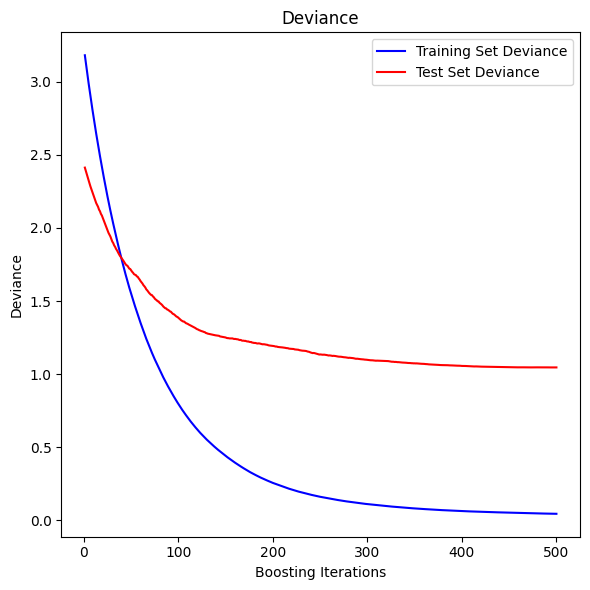

In [96]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

## Feature Importance

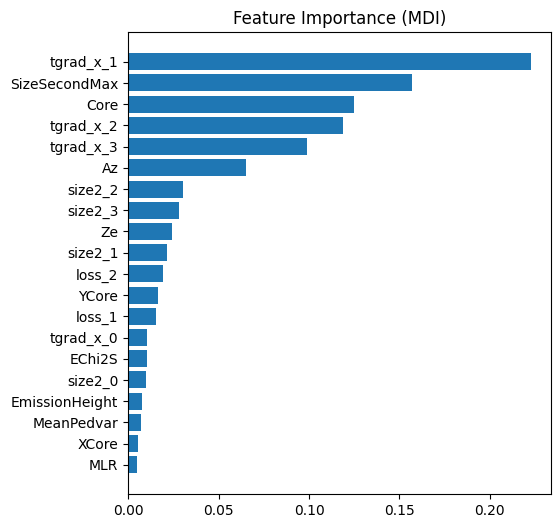

In [102]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
x = X.columns[rfecv.support_]

pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, x[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)


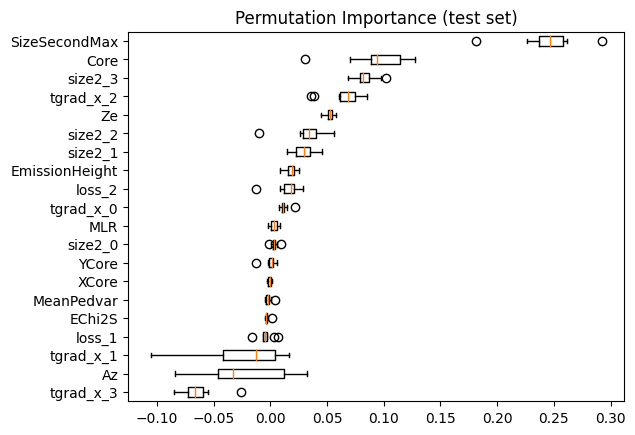

In [104]:
sorted_idx = result.importances_mean.argsort()
#plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=x[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

## PyCaret - Data Preprocessing - Normalizing

In [115]:
df1['SizeSecondMax']

0         2185.285400
1         1359.550049
2          586.034302
3          852.899780
4         5675.086426
             ...     
466417    1865.090820
466418     472.447540
466419     443.815369
466420    1289.475952
466421     541.147156
Name: SizeSecondMax, Length: 466422, dtype: float64

In [116]:
from pycaret.regression import *
reg1 = setup(data = df1, target = 'SizeSecondMax', normalize = True)

,Description,Value
0,Session id,8121
1,Target,SizeSecondMax
2,Target type,Regression
3,Original data shape,"(466422, 32)"
4,Transformed data shape,"(466422, 32)"
5,Transformed train set shape,"(326495, 32)"
6,Transformed test set shape,"(139927, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

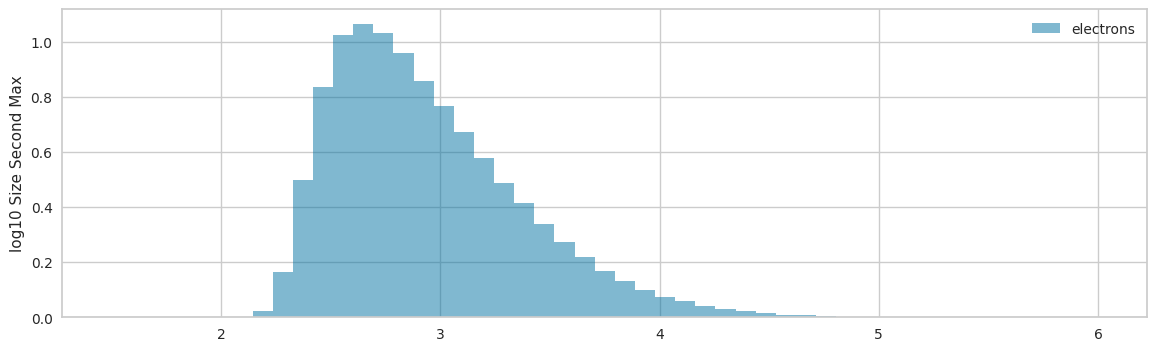

In [119]:
fig, ax = plt.subplots(figsize=(14, 4))  
ax.hist(np.log10(df1['SizeSecondMax']), alpha = 0.5, bins = np.linspace(1.5,6), label = 'electrons', density =True)
ax.set_ylabel('log10 Size Second Max')
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 4))  
ax.hist(np.log10(df1['SizeSecondMax']), alpha = 0.5, bins = np.linspace(1.5,6), label = 'electrons', density =True)